# The Monte Carlo method is a versatile and powerful tool in data science, with a wide range of applications. Here are some of the key use

# Simulation and Risk Analysis:

- Financial Modeling: Estimating the risk and uncertainty in financial markets, portfolio optimization, and pricing complex financial instruments.
- Operations Research: Simulating various business processes to predict outcomes and optimize operations.
- Optimization Problems:
    - Function Optimization: Finding the global maximum or minimum of complex functions where traditional methods might fail.
- Parameter Tuning: Optimizing hyperparameters in machine learning models.
- Statistical Sampling and Estimation:

- Integral Approximation: Estimating the value of definite integrals, especially in higher dimensions.
- Probability Estimation: Calculating probabilities of complex events where analytical solutions are not feasible.
- Bayesian Inference:

    - Posterior Distribution: Sampling from posterior distributions to make Bayesian inferences, using techniques like Markov Chain Monte Carlo (MCMC).
    - Model Comparison: Comparing different models or hypotheses by estimating their probabilities given the data.
Machine Learning and AI:

- Reinforcement Learning: Simulating different strategies to evaluate their performance and learn optimal policies.
- Robustness Testing: Testing the robustness and stability of machine learning models under different scenarios and data distributions.
Physics and Engineering:

Particle Physics: Simulating particle interactions to predict outcomes of experiments.
Engineering Design: Evaluating the reliability and performance of engineering systems under various conditions.
Queueing Theory:

Network Simulation: Modeling and analyzing the performance of networks, such as telecommunications and computer networks, under different traffic conditions.
Operations Management:

Supply Chain Management: Simulating supply chain operations to optimize inventory levels, production schedules, and logistics.
Healthcare:

Disease Spread: Modeling the spread of infectious diseases to predict future outbreaks and evaluate intervention strategies.
Medical Decision Making: Assessing the risks and benefits of different medical treatments and procedures.
Environmental Science:

Climate Modeling: Simulating climate systems to predict future climate changes and assess the impact of various factors.
Game Theory:

Strategy Evaluation: Evaluating and comparing different strategies in games and decision-making processes.
The Monte Carlo method's ability to handle uncertainty and complexity makes it an indispensable tool across these diverse applications in data science.

# Example 1: Predicting Traffic Flow at an Intersection
- Problem:
We want to predict the average number of cars passing through an intersection during peak hours. We assume the number of cars per minute follows a certain probability distribution based on historical data.

- Steps:
Define the Probability Distribution:
Let's assume the number of cars arriving per minute follows a normal distribution with a mean (
𝜇
μ) of 10 cars per minute and a standard deviation (
𝜎
σ) of 2 cars per minute.

Simulate Traffic for a Given Period:
We'll simulate the traffic flow for 60 minutes (1 hour) using the Monte Carlo method.

Run Multiple Simulations:
To get a robust estimate, we'll run the simulation 1,000 times and compute the average traffic flow.

In [3]:
import random

number_doors = 3
door_with_prize = random.randint(1,3)

chosen_door = int(input("There are 3 doors, one with a prize. Choose a door 1, 2, 3:\n"))
opened_door = random.choice([i for i in range(1, 4) if i != chosen_door and i != door_with_prize])

switch = input("You chose door {0}, but door {1} was opened. Do you want to switch? y/n\n".format(chosen_door, opened_door))

if switch == "y":
    opened_door = random.choice([i for i in range(1, 4) if i != chosen_door and i != door_with_prize])

if chosen_door == door_with_prize:
    print("You win a prize!")
else:
    print("Sorry, no prize")

There are 3 doors, one with a prize. Choose a door 1, 2, 3:
 1
You chose door 1, but door 2 was opened. Do you want to switch? y/n
 y


You win a prize!


Average number of cars per hour: 599.78
Standard deviation: 15.48


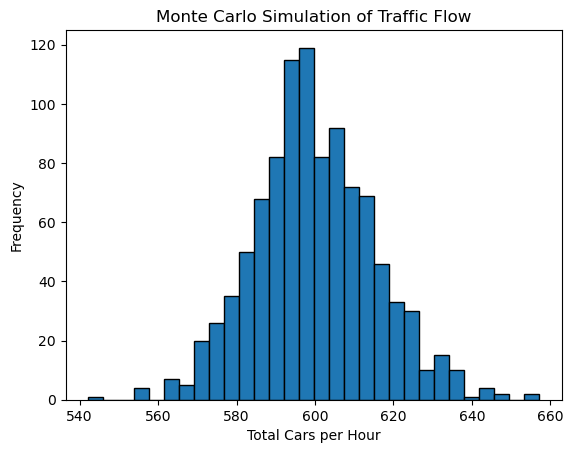

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_cars_per_minute = 10
std_dev_cars_per_minute = 2
simulation_duration_minutes = 60
num_simulations = 1000

# Function to simulate traffic flow for a given duration
def simulate_traffic_flow(duration, mean, std_dev):
    return np.random.normal(mean, std_dev, duration)

# Run multiple simulations
total_cars_per_simulation = []
for _ in range(num_simulations):
    cars_per_minute = simulate_traffic_flow(simulation_duration_minutes, mean_cars_per_minute, std_dev_cars_per_minute)
    total_cars_per_simulation.append(np.sum(cars_per_minute))

# Compute the average number of cars per hour
average_cars_per_hour = np.mean(total_cars_per_simulation)
std_dev_cars_per_hour = np.std(total_cars_per_simulation)

# Print results
print(f"Average number of cars per hour: {average_cars_per_hour:.2f}")
print(f"Standard deviation: {std_dev_cars_per_hour:.2f}")

# Plot histogram of the results
plt.hist(total_cars_per_simulation, bins=30, edgecolor='black')
plt.title('Monte Carlo Simulation of Traffic Flow')
plt.xlabel('Total Cars per Hour')
plt.ylabel('Frequency')
plt.show()


# Explanation:
- Parameters: We set the mean and standard deviation for the number of cars per minute.
Simulation Function: We define a function to simulate the traffic flow for a given duration using the normal distribution.
- Multiple Simulations: We run the simulation 1,000 times, each time summing the total number of cars for the 60-minute period.
- Results: We compute and print the average number of cars per hour and the standard deviation. We also plot a histogram to visualize the distribution of total cars per hour across all simulations.
This simple example demonstrates how the Monte Carlo method can be used to predict traffic flow by simulating random samples from a given probability distribution and aggregating the results to obtain an estimate.

## What coul be another scenario for the monte carlo method ? 

Using the Monte Carlo method for risk prediction in a financial institution involves simulating various financial scenarios to estimate potential losses and assess the risk. A common application is in Value at Risk (VaR) estimation, which quantifies the potential loss in value of a portfolio over a defined period for a given confidence interval.



# Example 2: Estimating Value at Risk (VaR)
Problem:
We want to estimate the Value at Risk (VaR) of a portfolio over a one-day period at a 95% confidence level. The portfolio consists of several financial instruments whose returns follow a known distribution based on historical data.

## Steps:
- Define the Portfolio and Historical Returns:
Assume we have a portfolio with historical returns for each asset.

- Generate Random Scenarios:
Simulate the returns for each asset in the portfolio using the historical distribution of returns.

- Calculate Portfolio Value:
Compute the portfolio value for each scenario.

- Determine VaR:
Calculate the potential losses and determine the VaR at the desired confidence level.

Value at Risk (VaR) at 95.0% confidence level: -0.25


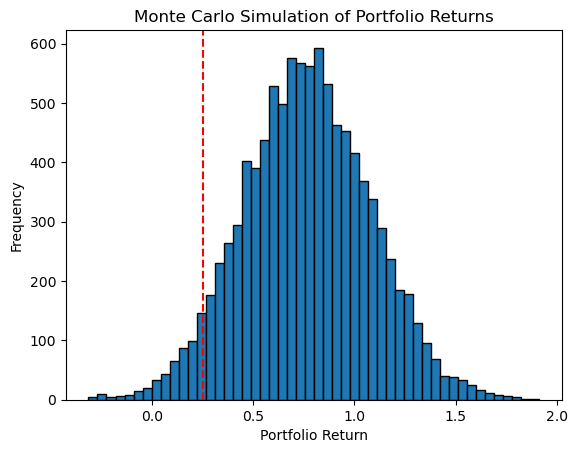

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample historical returns for 3 assets in the portfolio (for simplicity)
historical_returns = pd.DataFrame({
    'Asset1': np.random.normal(0.001, 0.02, 1000),
    'Asset2': np.random.normal(0.001, 0.015, 1000),
    'Asset3': np.random.normal(0.001, 0.01, 1000)
})

# Portfolio weights
weights = np.array([0.4, 0.4, 0.2])

# Number of simulations
num_simulations = 10000

# Function to simulate portfolio returns
def simulate_portfolio_returns(historical_returns, weights, num_simulations):
    num_assets = len(weights)
    num_days = historical_returns.shape[0]
    simulated_returns = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        # Randomly sample returns for each asset
        sampled_returns = historical_returns.sample(n=num_days, replace=True).values
        # Compute portfolio return for the sampled period
        portfolio_return = np.dot(sampled_returns, weights)
        # Sum of returns for the simulation period
        simulated_returns[i] = np.sum(portfolio_return)
    
    return simulated_returns

# Run simulations
simulated_returns = simulate_portfolio_returns(historical_returns, weights, num_simulations)

# Calculate VaR
confidence_level = 0.95
VaR = np.percentile(simulated_returns, (1 - confidence_level) * 100)

# Print results
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level: {-VaR:.2f}")

# Plot histogram of the simulated returns
plt.hist(simulated_returns, bins=50, edgecolor='black')
plt.axvline(x=VaR, color='r', linestyle='--')
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Portfolio Return')
plt.ylabel('Frequency')
plt.show()
